In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# set logging to stdout
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [27]:
from geolifeclef.loaders.GLC23PatchesProviders import (
    MultipleRasterPatchProvider,
    RasterPatchProvider,
    JpegPatchProvider,
)
from geolifeclef.loaders.GLC23Datasets import PatchesDataset

# root path of the data
data_path = "/mnt/data/raw/"
# take all rasters from human footprint detailed (2 rasters here)
p_hfp_d = MultipleRasterPatchProvider(
    data_path + "EnvironmentalRasters/HumanFootprint/detailed/"
)
# take only bio1 and bio2 from bioclimatic rasters (2 rasters from the 3 in the folder)
p_bioclim = MultipleRasterPatchProvider(
    data_path + "EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/",
    select=["bio1", "bio2"],
)
# take the human footprint 2009 summurized raster (a single raster)
p_hfp_s = RasterPatchProvider(
    data_path + "EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif"
)
# take all sentinel imagery layers (r,g,b,nir = 4 layers)
p_rgb = JpegPatchProvider(
    data_path + "SatellitePatches/",
    # very inefficient normalization in the data loading library
    normalize=False,
)

downloaded_path = "/mnt/data/downloaded/"
dataset = PatchesDataset(
    occurrences=downloaded_path + "PresenceOnlyOccurrences/GLC24-PO-metadata-train.csv",
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb),
)
len(dataset)

5079797

In [28]:
dataset.provider

Providers:
Rasters in folder:
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884

In [30]:
res = dataset[0]
res[0].shape

torch.Size([21, 128, 128])

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([21, 128, 128]), label: 2847.0
{'lat': 58.39928, 'lon': 16.20739, 'surveyId': 507942.0}


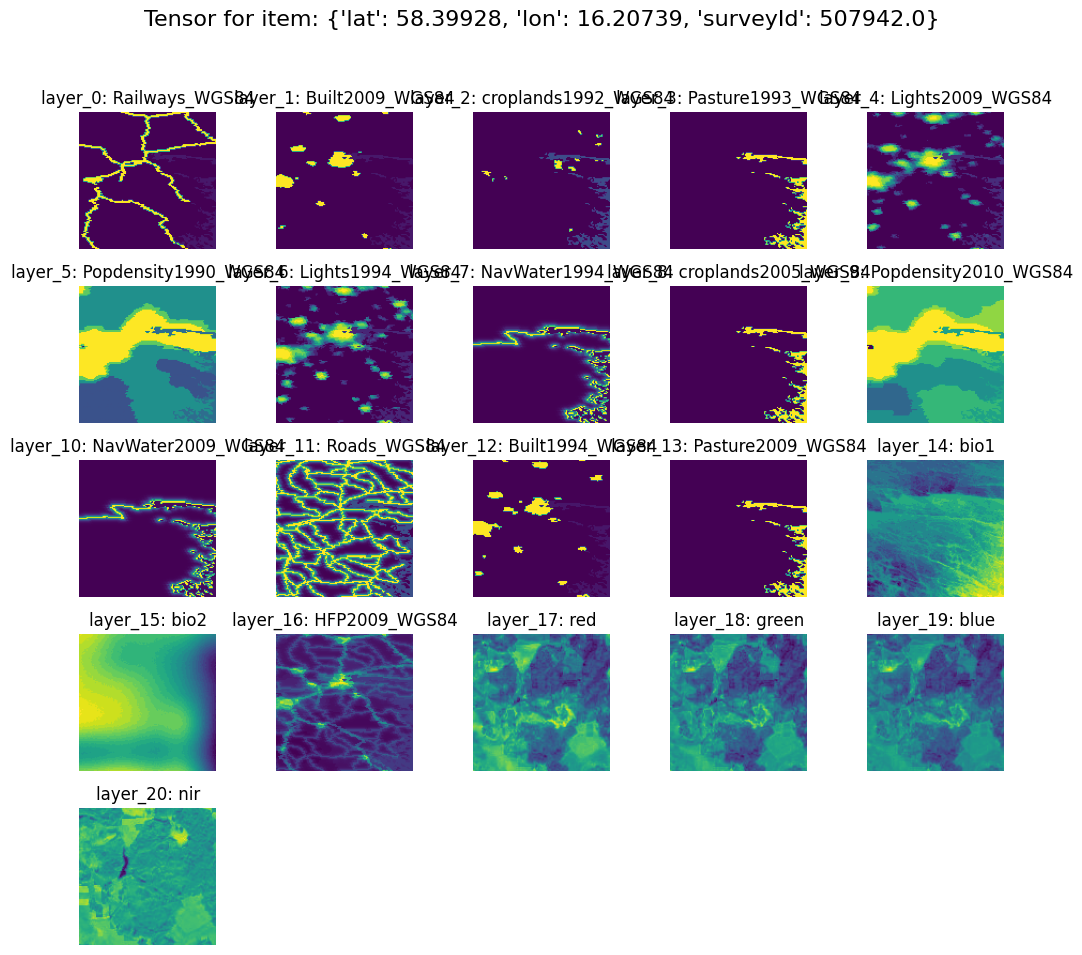

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([21, 128, 128]), label: 6848.0
{'lat': 56.71105, 'lon': 10.12014, 'surveyId': 906051.0}


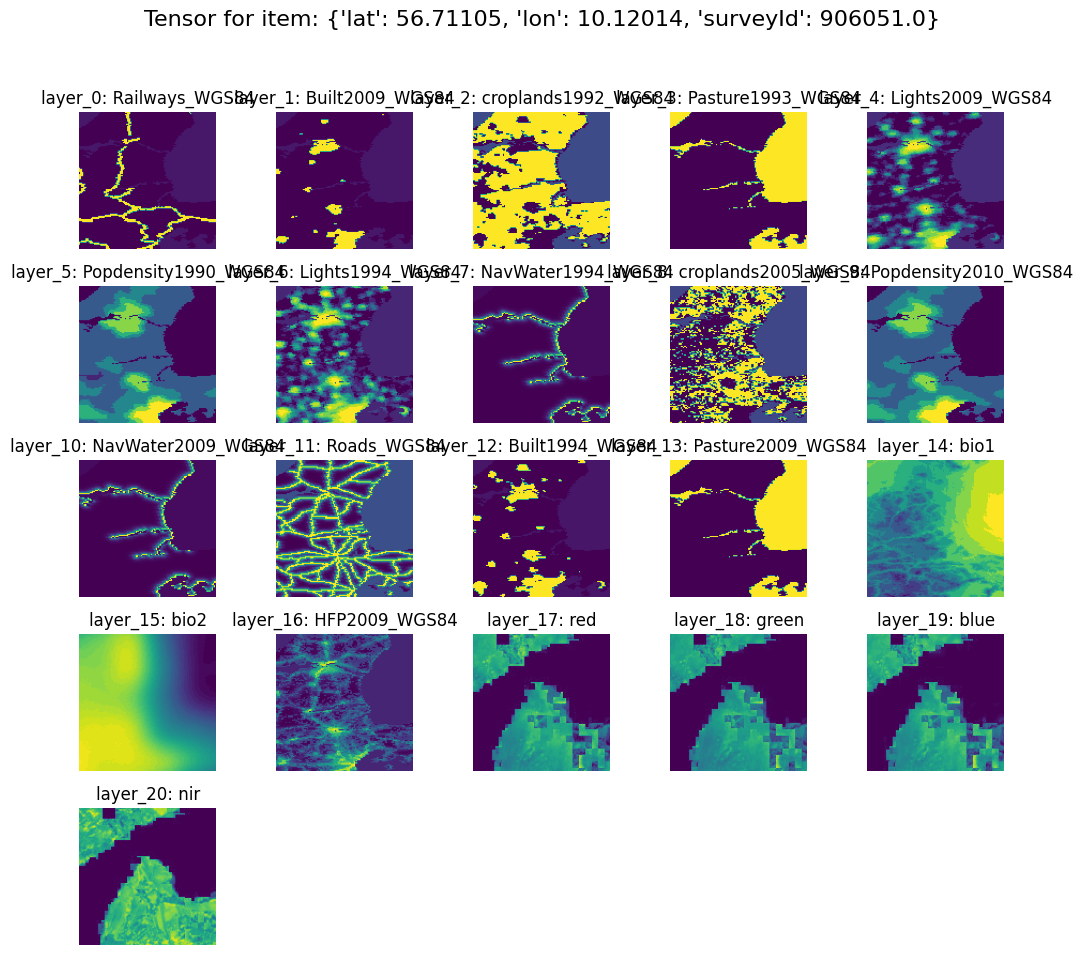

In [33]:
import random

ids = [random.randint(0, len(dataset) - 1) for i in range(2)]
for id in ids:
    tensor, label, item = dataset[id]
    print(
        "Tensor type: {}, tensor shape: {}, label: {}".format(
            type(tensor), tensor.shape, label
        )
    )
    print(item)
    dataset.plot_patch(id)

In [34]:
dataset.provider.bands_names

['Railways_WGS84',
 'Built2009_WGS84',
 'croplands1992_WGS84',
 'Pasture1993_WGS84',
 'Lights2009_WGS84',
 'Popdensity1990_WGS84',
 'Lights1994_WGS84',
 'NavWater1994_WGS84',
 'croplands2005_WGS84',
 'Popdensity2010_WGS84',
 'NavWater2009_WGS84',
 'Roads_WGS84',
 'Built1994_WGS84',
 'Pasture2009_WGS84',
 'bio1',
 'bio2',
 'HFP2009_WGS84',
 'red',
 'green',
 'blue',
 'nir']

In [31]:
tensor

tensor([[[ -0.2584,  -0.2584,  -0.2584,  ...,  -0.2584,  -0.2584,  -0.2584],
         [ -0.2584,  -0.2584,  -0.2584,  ...,  -0.2584,  -0.2584,  -0.2584],
         [ -0.2584,  -0.2584,  -0.2584,  ...,  -0.2584,  -0.2584,  -0.2584],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[ -0.2597,  -0.2597,  -0.2597,  ...,  -0.2597,  -0.2597,  -0.2597],
         [ -0.2597,  -0.2597,  -0.2597,  ...,  -0.2597,  -0.2597,  -0.2597],
         [ -0.2597,  -0.2597,  -0.2597,  ...,  -0.2597,  -0.2597,  -0.2597],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[ -0.5487,  -0.5487,  -0.5487,  ...

In [44]:
import pandas as pd

zipped = list(zip(dataset.provider.bands_names, tensor.cpu().numpy()))
zipped
# single row
row = {k: v.reshape(-1) for k, v in zipped}
df = pd.DataFrame([row])
df

,Railways_WGS84,Built2009_WGS84,croplands1992_WGS84,Pasture1993_WGS84,Lights2009_WGS84,Popdensity1990_WGS84,Lights1994_WGS84,NavWater1994_WGS84,croplands2005_WGS84,Popdensity2010_WGS84,...,Roads_WGS84,Built1994_WGS84,Pasture2009_WGS84,bio1,bio2,HFP2009_WGS84,red,green,blue,nir
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.25121498, -0.25121498, -0.25121498, -0.251...","[0.078692235, 0.078692235, 0.078692235, 0.0786...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[101.0, 100.0, 101.0, 102.0, 101.0, 99.0, 100....","[100.0, 99.0, 100.0, 101.0, 100.0, 98.0, 98.0,...","[105.0, 104.0, 105.0, 106.0, 105.0, 103.0, 103...","[133.0, 138.0, 133.0, 129.0, 128.0, 122.0, 123..."


In [ ]:
# let's test the dct and idct
from scipy.fftpack import dct, idct

band = tensor[0].cpu().numpy()